# 👦🏻 나랑 닮은 연예인은 누구?

## Step1. 사진 모으기

### 1. 내 사진 찍기

필요한 라이브러리를 import하고 본인 사진 3장을 클라우드 경로에 업로드 후, plt로 출력한다.

file_list: ['img3.jpg', 'img1.jpg', 'img2.jpg']


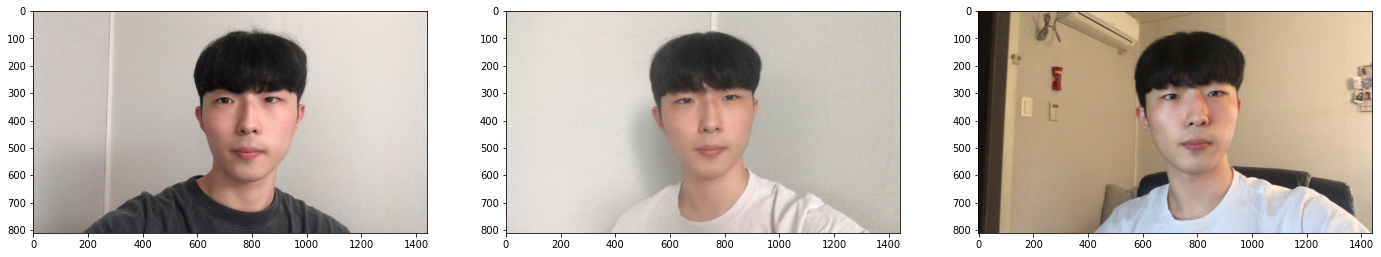

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
import numpy as np
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/imgs'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,10))

for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

dilb를 사용해 만들어진 얼굴인식 라이브러리를 이용해 face roi를 추출한다. 

In [6]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    if len(face_locations[0]) == 0:
        return None
    
    else :
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]

        return cropped_face

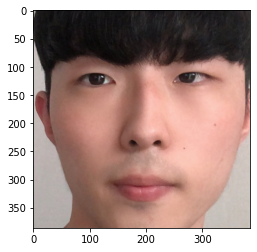

In [7]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/imgs/img3.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

face roi를 추출했다면 적은 차원의 벡터로 만들기 위해서 딥러닝을 사용한다. 적은 차원의 임베딩 벡터에는 상대적인 비교 수치가 포함돼있다.

In [8]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [9]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [10]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['img3']

array([-0.08225179,  0.05872317,  0.00874646, -0.04750773, -0.13705839,
        0.02941765, -0.06645745, -0.08988257,  0.09023105, -0.13177696,
        0.18504868, -0.0439314 , -0.20018511, -0.08022952, -0.09899411,
        0.17662661, -0.11533859, -0.18033564, -0.01301386,  0.0233954 ,
        0.14747001,  0.0556879 , -0.05518998,  0.04473354, -0.05188327,
       -0.3170082 , -0.09041723, -0.05071717,  0.03416013, -0.09254909,
       -0.04198733, -0.00052488, -0.17281838, -0.01429162,  0.02564097,
        0.05617546,  0.00647791, -0.08135349,  0.12607001,  0.02754018,
       -0.26230898,  0.08346148,  0.01398992,  0.2323022 ,  0.17665555,
        0.03121503,  0.02998583, -0.16996187,  0.13214004, -0.15359147,
        0.02603941,  0.14685009,  0.10226361,  0.05001286, -0.04620172,
       -0.11973951,  0.04868783,  0.09437507, -0.15462729,  0.06498898,
        0.0987353 , -0.07061639,  0.00859559, -0.06094697,  0.16013528,
        0.01133143, -0.11684688, -0.26633441,  0.11485915, -0.19

In [11]:
A = embedding_dict['img1']
B = embedding_dict['img2']
C = embedding_dict['img3']



distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 0.18698805951875447
Distance between B and C: 0.2902842360789857


### 2. 비교할 연예인 사진 모으기

퍼실님께서 공유해주신 zip파일을 받아 os.getenv('HOME')+'/aiffel/face_embedding/celebrity' 경로에 연예인 사진 278개를 저장했다.

## Step2. 얼굴 영역 자르기

In [12]:
celebrity_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
cel_file_list = os.listdir(celebrity_path)

print ("file_list: {}".format(cel_file_list[:10]))

file_list: ['매드클라운.jpeg', '온앤오프효진.jpg', '조승우.jpeg', 'bush.jpeg', '크리스 에반스.jpg', '강미나.jpg', '레드벨벳웬디.jpg', '이동휘.jpg', '이경규.jpeg', '이대형.jpg']


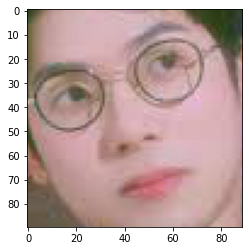

In [13]:
cel_image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/매드클라운.jpeg'

cel_cropped_face = get_cropped_face(cel_image_path)
plt.imshow(cel_cropped_face)

In [14]:
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/celebrity_roi/'

for cel_img in cel_file_list:
    cel_image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/' + cel_img
    cel_cropped_face = get_cropped_face(cel_image_path)
    pillow_image = Image.fromarray(cel_cropped_face)
    pillow_image.save(path_to_save + cel_img)


cel_image_path 경로에 있는 연예인 사진들을 face detect를 통해 roi를 추출하고 path_to_save 경로에 저장한다.

## Step3. 얼굴 영역의 임베딩 추출하기

연예인 얼굴사진의 roi가 저장됐다면 본인 얼굴과 비교하기위해 임베딩 벡터를 추출한다.

In [14]:
import face_recognition

cel_faceroi_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity_roi'

def get_face_embedding_dict2(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        
        ext_ = os.path.splitext(img_path)[1]

        if ext_ not in ['jpg', 'gif', 'png', 'jpeg']:
            pass
        face = np.array(Image.open(img_path))
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
#         # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
#         # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict


embedding_dict2 = get_face_embedding_dict2(cel_faceroi_path)


In [15]:
embedding_dict2['트와이스미나']

array([-0.09717799,  0.09370271,  0.06490362, -0.09193487, -0.18670583,
        0.0252365 , -0.11594844, -0.0820827 ,  0.09349517, -0.19281572,
        0.22307353, -0.12805808, -0.21574651,  0.0122386 , -0.05613238,
        0.22099054, -0.12314523, -0.15433516, -0.02106538, -0.0007401 ,
        0.08996897,  0.04578484, -0.05278357,  0.03622121, -0.1295359 ,
       -0.35190865, -0.09148228, -0.01849273, -0.10139261, -0.07339688,
       -0.04844162,  0.04240267, -0.22373195,  0.00990705,  0.03412192,
        0.16913103,  0.02392527, -0.06868603,  0.08336977,  0.02345385,
       -0.26780307,  0.08839666,  0.09194138,  0.24485312,  0.14007072,
        0.00321474, -0.00124236, -0.10149354,  0.04804094, -0.17353439,
        0.04850245,  0.10050859,  0.08475726,  0.03063796,  0.01741271,
       -0.12574603,  0.06237952,  0.1366028 , -0.13777317, -0.01271311,
        0.15818346, -0.10228093, -0.00307385, -0.11898308,  0.24504137,
        0.09766386, -0.08476423, -0.22330487,  0.10650554, -0.11

## Step4. 모은 연예인들과 비교하기

연예인 사진들의 임베딩 벡터와 본인 사진의 임베딩 벡터들의 거리를 계산해 오차가 가장 적은 사진을 순서대로 정렬후, 가장 오차가 적은 사진을 닮은꼴 사진으로 판단하는 알고리즘을 구현한다.

In [16]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict2[name2], ord=2)

get_distance('img1', '개리')

0.530818642053167

In [17]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


In [18]:
top_num = 5

def get_nearest_face(name, top=top_num):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict2.items(), key=lambda x:sort_key_func(x[0]))
    cel_name_list = []
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            cel_name_list.append(sorted_faces[i][0])

    return cel_name_list, name

In [19]:
list1, name1 = get_nearest_face('img1')
list1

순위 1 : 이름(윤균상), 거리(0.4183246194721264)
순위 2 : 이름(b1a4진영), 거리(0.42354386457633536)
순위 3 : 이름(박서준), 거리(0.42963173214865896)
순위 4 : 이름(씨잼), 거리(0.43161827514312917)
순위 5 : 이름(디오), 거리(0.4334504824188348)


['윤균상', 'b1a4진영', '박서준', '씨잼', '디오']

In [20]:
list2, name2 = get_nearest_face('img2')

순위 1 : 이름(류준열), 거리(0.42127810288209405)
순위 2 : 이름(박건우), 거리(0.4285242445664025)
순위 3 : 이름(손흥민), 거리(0.43532836808753056)
순위 4 : 이름(슬리피), 거리(0.435832575670056)
순위 5 : 이름(RM), 거리(0.4400546065840438)


In [21]:
list3, name3 = get_nearest_face('img3')

순위 1 : 이름(박건우), 거리(0.39897857735956377)
순위 2 : 이름(류준열), 거리(0.4018030906235764)
순위 3 : 이름(하현우), 거리(0.42540562095654566)
순위 4 : 이름(꽈두룹), 거리(0.4321121550177173)
순위 5 : 이름(씨잼), 거리(0.4343902370636845)


## Step5. 다양한 재미있는 시각화 시도해보기

노드에는 사진을 시각화 하는 알고리즘이 없기 때문에 matplotlib를 이용해 시각화를 해볼 예정이다.

In [22]:
file_list = os.listdir(cel_faceroi_path)
file_name_list = []
file_ex_list = []

for file in file_list:
    img_path = os.path.join(dir_path, file)

    file_name_list.append(img_path.split('/')[-1].split('.')[0])
    
    file_ex_list.append(img_path.split('/')[-1].split('.')[1])

In [23]:
list1

sim_cel_path = []

for name in list1:
    sim_cel_path.append(cel_faceroi_path + '/' + name + '.' + file_ex_list[file_name_list.index(name)])
    
sim_cel_path

['/aiffel/aiffel/face_embedding/celebrity_roi/윤균상.jpg',
 '/aiffel/aiffel/face_embedding/celebrity_roi/b1a4진영.jpeg',
 '/aiffel/aiffel/face_embedding/celebrity_roi/박서준.jpeg',
 '/aiffel/aiffel/face_embedding/celebrity_roi/씨잼.jpg',
 '/aiffel/aiffel/face_embedding/celebrity_roi/디오.jpeg']

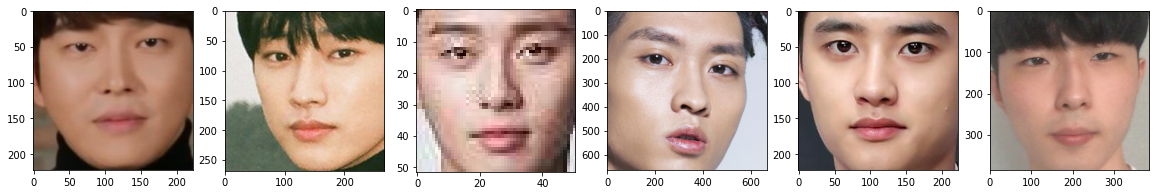

In [24]:
person_path = os.getenv('HOME')+'/aiffel/face_embedding/imgs/' + name1 +'.jpg'
cropped_face = get_cropped_face(person_path)


fig = plt.figure(figsize=(20,20))


for i in range(len(sim_cel_path)):
    ax = fig.add_subplot(1,top_num+1,i+1)
    
    face = np.array(Image.open(sim_cel_path[i]))
    ax.imshow(face)

ax = fig.add_subplot(1,top_num+1,top_num+1)
ax.imshow(cropped_face)
plt.show()
    

임베딩 벡터의 거리가 적은 5개의 사진의 경로를 list에 저장후, figure에 출력했다.

# 🔍 회고

> - Dlib는 주로 ResNet-34 model에서 영감을 얻었다. 얼굴인식에 가장 많이 사용되는 패키지중 하나이다. 
> - Hog와 SVM의 Sliding window로 얼굴을 찾는 face detector 기능을 제공한다.
> - 어떤 데이터들을 vector화 하여, vector space상에 표현하는것을 Embedding 이라고 한다.
> - 고차원의 데이터를 저차원으로 바꾼 임베딩처럼 다차원 벡터를 시각화 하기위해서 차원 축소를 하는 PCA, T-SNE기법들이 존재한다.
> - PCA : 주성분 분석이라 불리며, 모든 차원의 축에 따른 값의 변화도인 분산을 확인한 후, 가장 변화가 큰 축을 계산하는 기법.
> - T-SNE : 고차원 상에서 먼 거리를 저차원 상에서도 멀리 배치되도록 차원을 축소 하는 기법. random하게 목표하는 차원에 데이터를 배치한 후 각 데이터들을 고차원상에서 배치와 비교를 해가며 위치를 변경한다.